In [6]:
import geopandas as gpd
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()
pd.set_option('display.max_columns', None)  # Show all columns

In [7]:
place_fp = os.path.join(os.getenv("BOX_PATH"), "EJ_Paper/dac_shapefiles/place/pdac20.shp")
gsa_fp = os.path.join(os.getenv("BOX_PATH"), "EJ_Paper/dac_shapefiles/gsa/gsa.shp")
gsp_fp = os.path.join(os.getenv("BOX_PATH"), "EJ_Paper/dac_shapefiles/gsp/gsp.shp")


place_bounds = gpd.read_file(place_fp)
gsp_bounds = gpd.read_file(gsp_fp)

pd.set_option('display.max_columns', None) 
print(gsp_bounds.head())


   OBJECTID  GSP_ID               Loc_GSP_ID Basin_Numb Basin_Subb  \
0         1      13  DM_NorthCentral_Adopted      5-022   5-022.07   
1         2      14       DM_Farmers_Adopted      5-022   5-022.07   
2         3      58              East Kaweah      5-022   5-022.11   
3         4      75                     None      9-010      9-010   
4         5      76                     None      9-007   9-007.01   

            Basin_Name                                       Basin_Su_1  \
0   SAN JOAQUIN VALLEY               SAN JOAQUIN VALLEY - DELTA-MENDOTA   
1   SAN JOAQUIN VALLEY               SAN JOAQUIN VALLEY - DELTA-MENDOTA   
2   SAN JOAQUIN VALLEY                      SAN JOAQUIN VALLEY - KAWEAH   
3   SAN PASQUAL VALLEY                               SAN PASQUAL VALLEY   
4  SAN LUIS REY VALLEY  SAN LUIS REY VALLEY - UPPER SAN LUIS REY VALLEY   

         Pln_Mngr                PM_Email          POC   Submitted  \
0     John Brodie  john.brodie@sldmwa.org  John Brodie  20

In [8]:

place_bounds = place_bounds[['GEOID20', 'NAME20', 'Pop20', 'MHI20', 'HH20', 'DAC20', 'geometry']]
gsp_bounds = gsp_bounds[['GSP_ID', 'Basin_Name', 'Basin_Numb', 'Basin_Subb', 'Basin_Su_1', 'geometry']]

print(place_bounds.shape)
print(gsp_bounds.shape)

(1611, 7)
(120, 6)


In [9]:
intersections = gpd.overlay(place_bounds, gsp_bounds, how='intersection')
intersections

,GEOID20,NAME20,Pop20,MHI20,HH20,DAC20,GSP_ID,Basin_Name,Basin_Numb,Basin_Subb,Basin_Su_1,geometry
0,0685586,Williams,5284,72778,1460,N,92,SACRAMENTO VALLEY,5-021,5-021.52,SACRAMENTO VALLEY - COLUSA,"POLYGON ((-13600557.789 4743581.705, -13600490..."
1,0614946,Colusa,6111,54605,2452,Y,92,SACRAMENTO VALLEY,5-021,5-021.52,SACRAMENTO VALLEY - COLUSA,"MULTIPOLYGON (((-13585111.429 4751034.371, -13..."
2,0654274,Orland,7843,47260,2703,Y,92,SACRAMENTO VALLEY,5-021,5-021.52,SACRAMENTO VALLEY - COLUSA,"POLYGON ((-13604429.268 4830331.645, -13604430..."
3,0685684,Willows,6053,48140,2245,Y,92,SACRAMENTO VALLEY,5-021,5-021.52,SACRAMENTO VALLEY - COLUSA,"POLYGON ((-13605392.624 4797050.296, -13605387..."
4,0602420,Arbuckle,3368,70661,797,N,92,SACRAMENTO VALLEY,5-021,5-021.52,SACRAMENTO VALLEY - COLUSA,"POLYGON ((-13589248.505 4723650.656, -13589061..."
...,...,...,...,...,...,...,...,...,...,...,...,...
839,0644140,Los Molinos,1924,42656,685,Y,139,SACRAMENTO VALLEY,5-021,5-021.56,SACRAMENTO VALLEY - LOS MOLINOS,"POLYGON ((-13594233.007 4870464.101, -13594217..."
840,0682786,Vina,212,0,59,Data Not Available,139,SACRAMENTO VALLEY,5-021,5-021.56,SACRAMENTO VALLEY - LOS MOLINOS,"POLYGON ((-13588371.988 4857050.396, -13588370..."
841,0655058,Pala,1094,93393,351,N,76,SAN LUIS REY VALLEY,9-007,9-007.01,SAN LUIS REY VALLEY - UPPER SAN LUIS REY VALLEY,"POLYGON ((-13035427.651 3943575.174, -13035426..."
842,0657372,Piru,2126,59000,618,Y,72,SANTA CLARA RIVER VALLEY,4-004,4-004.06,SANTA CLARA RIVER VALLEY - PIRU,"MULTIPOLYGON (((-13227847.774 4082763.923, -13..."


In [10]:
unique_places = intersections.dissolve(by='GSP_ID', 
                                       as_index=False,
                                       aggfunc = {
                                           'NAME20': lambda x: x.unique(),
                                           'Basin_Name': lambda x: x.unique()[0],
                                           'Basin_Numb': lambda x: x.unique()[0], 
                                           'Basin_Subb': lambda x: x.unique()[0],   
                                       }) 

unique_places

,GSP_ID,geometry,NAME20,Basin_Name,Basin_Numb,Basin_Subb
0,8,"MULTIPOLYGON (((-13395343.136 4370835.256, -13...","[Huron, Mendota, Avenal, Cantua Creek, Kettlem...",SAN JOAQUIN VALLEY,5-022,5-022.09
1,9,"MULTIPOLYGON (((-13416148.092 4458007.678, -13...","[Livingston, Atwater, Merced, Bear Creek, Cres...",SAN JOAQUIN VALLEY,5-022,5-022.04
2,11,"MULTIPOLYGON (((-13571269.709 4435116.177, -13...","[Santa Cruz, Capitola, Scotts Valley, Aptos, A...",SANTA CRUZ MID-COUNTY,3-001,3-001
3,12,"POLYGON ((-13382870.349 4453458.192, -13382869...","[Chowchilla, Fairmead]",SAN JOAQUIN VALLEY,5-022,5-022.05
4,13,"MULTIPOLYGON (((-13489393.216 4508105.075, -13...","[Newman, Patterson, Modesto, Crows Landing, Gr...",SAN JOAQUIN VALLEY,5-022,5-022.07
...,...,...,...,...,...,...
111,149,"POLYGON ((-13115095.112 4033085.050, -13114914...","[San Dimas, Pomona, Industry, Diamond Bar]",SAN GABRIEL VALLEY,4-013,4-013
112,150,"MULTIPOLYGON (((-13243569.323 4172054.750, -13...","[Bakersfield, Arvin, Taft, Bear Valley Springs...",SAN JOAQUIN VALLEY,5-022,5-022.14
113,155,"POLYGON ((-13311218.268 4084325.291, -13311227...","[Santa Barbara, Montecito, Summerland, Toro Ca...",MONTECITO,3-049,3-049
114,156,"POLYGON ((-13239131.808 4059061.346, -13239102...","[Thousand Oaks, Santa Rosa Valley]",ARROYO SANTA ROSA VALLEY,4-007,4-007


<Axes: >

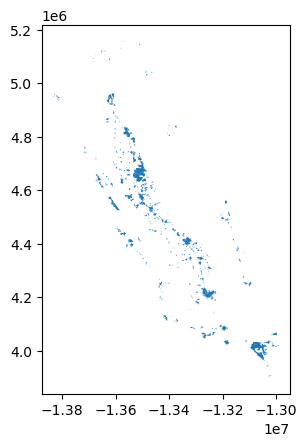

In [11]:
unique_places.plot()